Policy-Iteration Algorithm:
In every iteration, first obtain the value function for the current policy. Then, try every pair of (s,a). We choose the action that returns the maximum reward for every state s. Combinate 16 actions with 16 states, we get the optimal policy.

In [24]:
import numpy as np
import gym
import matplotlib.pyplot as plt

def Policy_Evaluation(env, gamma, policy, threshold):
    #initialize values for all states
    values = np.zeros(env.observation_space.n)
    #initialize the difference(true value function - estimated value function) with a large number 
    difference = 9999999
    while(difference > threshold):
        old_values = np.copy(values)
        for s in range(env.observation_space.n):
            a = policy[s]
            value = 0
            for prob, nextState, r, _ in env.P[s][a]:
                value += prob * (r + gamma * old_values[nextState])
            values[s] = value
        difference = np.sum(np.fabs(old_values - values))
    return values

#given value function, find the action to every state that gives the max reward. Record these action, we can get a new policy
def Policy_Improvement(env, gamma, value_function):
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        Qs = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for prob, nextState, r, _ in env.P[s][a]:
                Qs[a] += prob*(r + gamma * value_function[nextState])
        policy[s] = np.argmax(Qs)
    return policy


def Iterative_Policy_Iteration(env, gamma, num_iterations, threshold):
    #initialize a policy 
    policy = np.random.choice(4, size=(16))
    for i in range(num_iterations):
        #return the value for every state under one specific policy
        value_function = Policy_Evaluation(env, gamma, policy, threshold)
        updated_policy = Policy_Improvement(env, gamma, value_function)
        #check if converged
        if policy.all() == updated_policy.all():
            return policy 
        policy = updated_policy
    return policy

In [25]:
env = gym.make("FrozenLake-v1")
env.reset()
gamma = 1
num_iterations = 100000
threshold = 1e-30
optimal_policy = Iterative_Policy_Iteration(env, gamma, num_iterations, threshold)
print(optimal_policy)

[3 3 1 0 0 3 0 0 2 0 3 0 1 2 2 1]


e:\python\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
e:\python\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


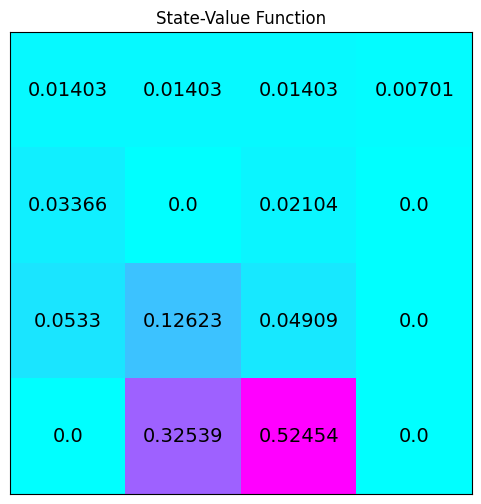

In [26]:
#visualization: the policy is not intuitive. The values for each state is intuitive: you can always choose the state with higher reward given the value function
def Value_Function_Visualization(value_function):
    square = np.reshape(value_function,(4,4))
    figure = plt.figure(figsize=(6,6))
    ax = figure.add_subplot(111)
    im = ax.imshow(square, cmap='cool')
    for (j,i), label in np.ndenumerate(square):
        ax.text(i,j, np.round(label,5), ha='center', va='center', fontsize=14)
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title('State-Value Function')
    plt.show()

optimal_value_function = Policy_Evaluation(env, gamma, optimal_policy, threshold)
Value_Function_Visualization(optimal_value_function)

SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)

Compared to the actual state, it makes sense. The value is 0 for all holes. And as the square approaches the goal, the value becomes larger.